In [1]:
# 📦 Install Required Packages (Uncomment if needed)
# !pip install wordcloud seaborn nltk scikit-learn

# 📚 Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix


In [2]:
# 🔽 Download NLTK Resources
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
# 📥 Load Dataset
df = pd.read_csv(r"C:\Users\ASUS\OneDrive\Documents\LLM\Womens Clothing E-Commerce Reviews.csv")
df = df.dropna(subset=['Review Text'])  # Remove rows with missing reviews

In [4]:
# 🎯 Define Sentiment
def label_sentiment(rating):
    if rating >= 4:
        return 1  # Positive
    elif rating <= 2:
        return 0  # Negative
    else:
        return 'neutral'

df['label'] = df['Rating'].apply(label_sentiment)
df = df[df['label'] != 'neutral']  # Drop neutral reviews
df = df[['Review Text', 'label']]
df.rename(columns={'Review Text': 'text'}, inplace=True)

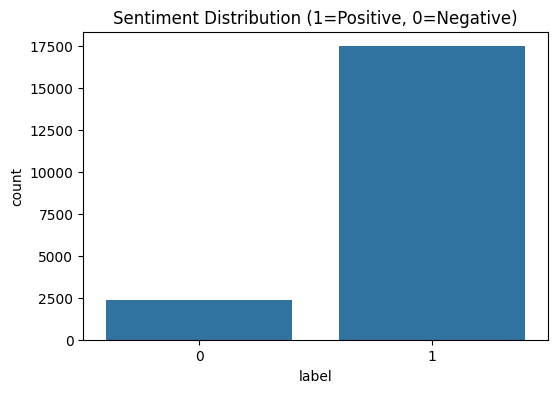

In [5]:
# 📊 Plot Sentiment Distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='label')
plt.title("Sentiment Distribution (1=Positive, 0=Negative)")
plt.show()

In [6]:
# 🧹 Text Preprocessing
lemmatizer = WordNetLemmatizer()
def text_transformation(text_column):
    corpus = []
    for item in text_column:
        text = re.sub('[^a-zA-Z]', ' ', str(item)).lower()
        words = text.split()
        words = [lemmatizer.lemmatize(word) for word in words if word not in set(stopwords.words('english'))]
        corpus.append(' '.join(words))
    return corpus

corpus = text_transformation(df['text'])


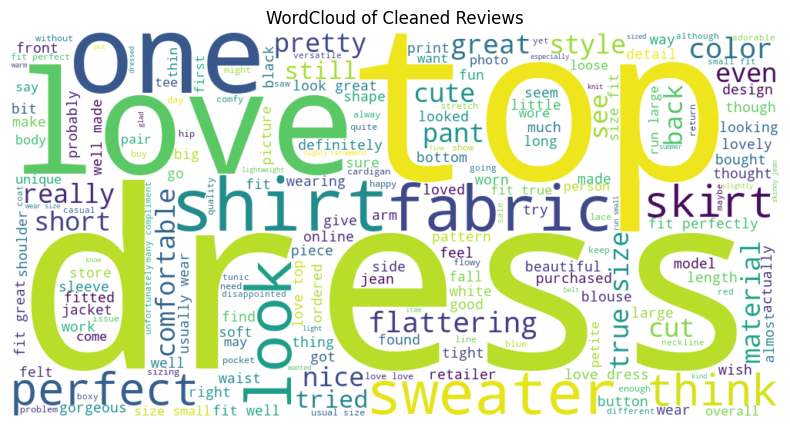

In [7]:
# ☁️ WordCloud
word_cloud = " ".join(corpus)
wordcloud = WordCloud(width=1000, height=500, background_color='white').generate(word_cloud)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud of Cleaned Reviews")
plt.show()

In [8]:
# 🔤 Vectorization
cv = CountVectorizer(ngram_range=(1, 2))
X = cv.fit_transform(corpus)
y = df['label']

In [9]:
# 📂 Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# 🧠 Model Selection using GridSearchCV
params = {
    'max_features': ['sqrt'],
    'n_estimators': [100],
    'max_depth': [10, None],
    'min_samples_split': [5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True]
}
grid = GridSearchCV(RandomForestClassifier(), param_grid=params, cv=2, verbose=1, n_jobs=-1)
grid.fit(X_train, y_train)
best_model = grid.best_estimator_

Fitting 2 folds for each of 4 candidates, totalling 8 fits


In [14]:
# Ensure labels are integers
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# Now fit the GridSearchCV
grid.fit(X_train, y_train)
best_model = grid.best_estimator_

Fitting 2 folds for each of 4 candidates, totalling 8 fits


In [15]:
# ✅ Evaluation
y_pred = best_model.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Precision Score:", precision_score(y_test, y_pred))
print("Recall Score:", recall_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 0.8839556004036327
Precision Score: 0.8834262544348708
Recall Score: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.04      0.07       478
           1       0.88      1.00      0.94      3486

    accuracy                           0.88      3964
   macro avg       0.94      0.52      0.51      3964
weighted avg       0.90      0.88      0.83      3964



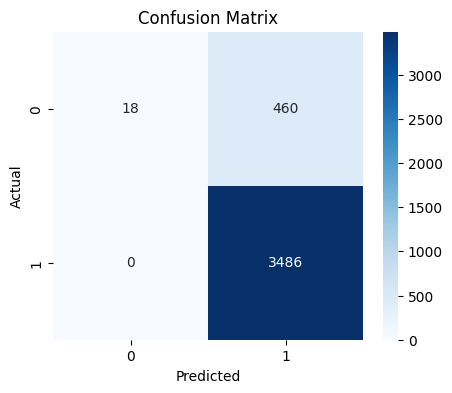

In [16]:
# 📉 Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [17]:
# 💬 Sentiment Predictor
def expression_check(prediction_input):
    if prediction_input == 0:
        print("Input statement has Negative Sentiment.")
    elif prediction_input == 1:
        print("Input statement has Positive Sentiment.")

def sentiment_predictor(input_list):
    input_transformed = text_transformation(input_list)
    input_vector = cv.transform(input_transformed)
    prediction = best_model.predict(input_vector)
    expression_check(prediction[0])

In [20]:
# 🧪 Try It
input1 = ["I was really hoping to like this, but it did not look the way it does on the model, at least not on me. the sharkbite hem is much more pronounced and looser. the one in the photo looks like it was pinned back. i am 5'8' and usually wear a medium or large. i got a medium and there was a lot more material on the bottom half than the photo shows. it made me look bigger and was not flattering. material has a nice weave but it's thin and delicate. i bought the (holly) deep olive and the blue. colors"]
input2 = ["I bought a new dress and it's absolutely beautiful!"]
sentiment_predictor(input1)
sentiment_predictor(input2)

Input statement has Negative Sentiment.
Input statement has Positive Sentiment.
